In [ ]:
#%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import scipy.stats as stats

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('monthly_deaths.csv')

In [4]:
#Shape
df_yearly.shape

(12, 4)

In [ ]:
df_monthly.shape

(98, 3)

In [ ]:
#Column names
df_yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [ ]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [ ]:
#Are there Nan values
df_yearly.isna().values.any()

False

In [ ]:
df_monthly.isna().values.any()

False

In [ ]:
#Average number of births and deaths that took place per month/per year
df_yearly.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [ ]:
df_monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


In [ ]:
#Using the annual data, calculate the percentage of women giving birth who died 
#throughout the 1840s at the hospital.
prob = df_yearly.deaths.sum()/df_yearly.births.sum()*100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}')

Chances of dying in the 1840s in Vienna: 7.08


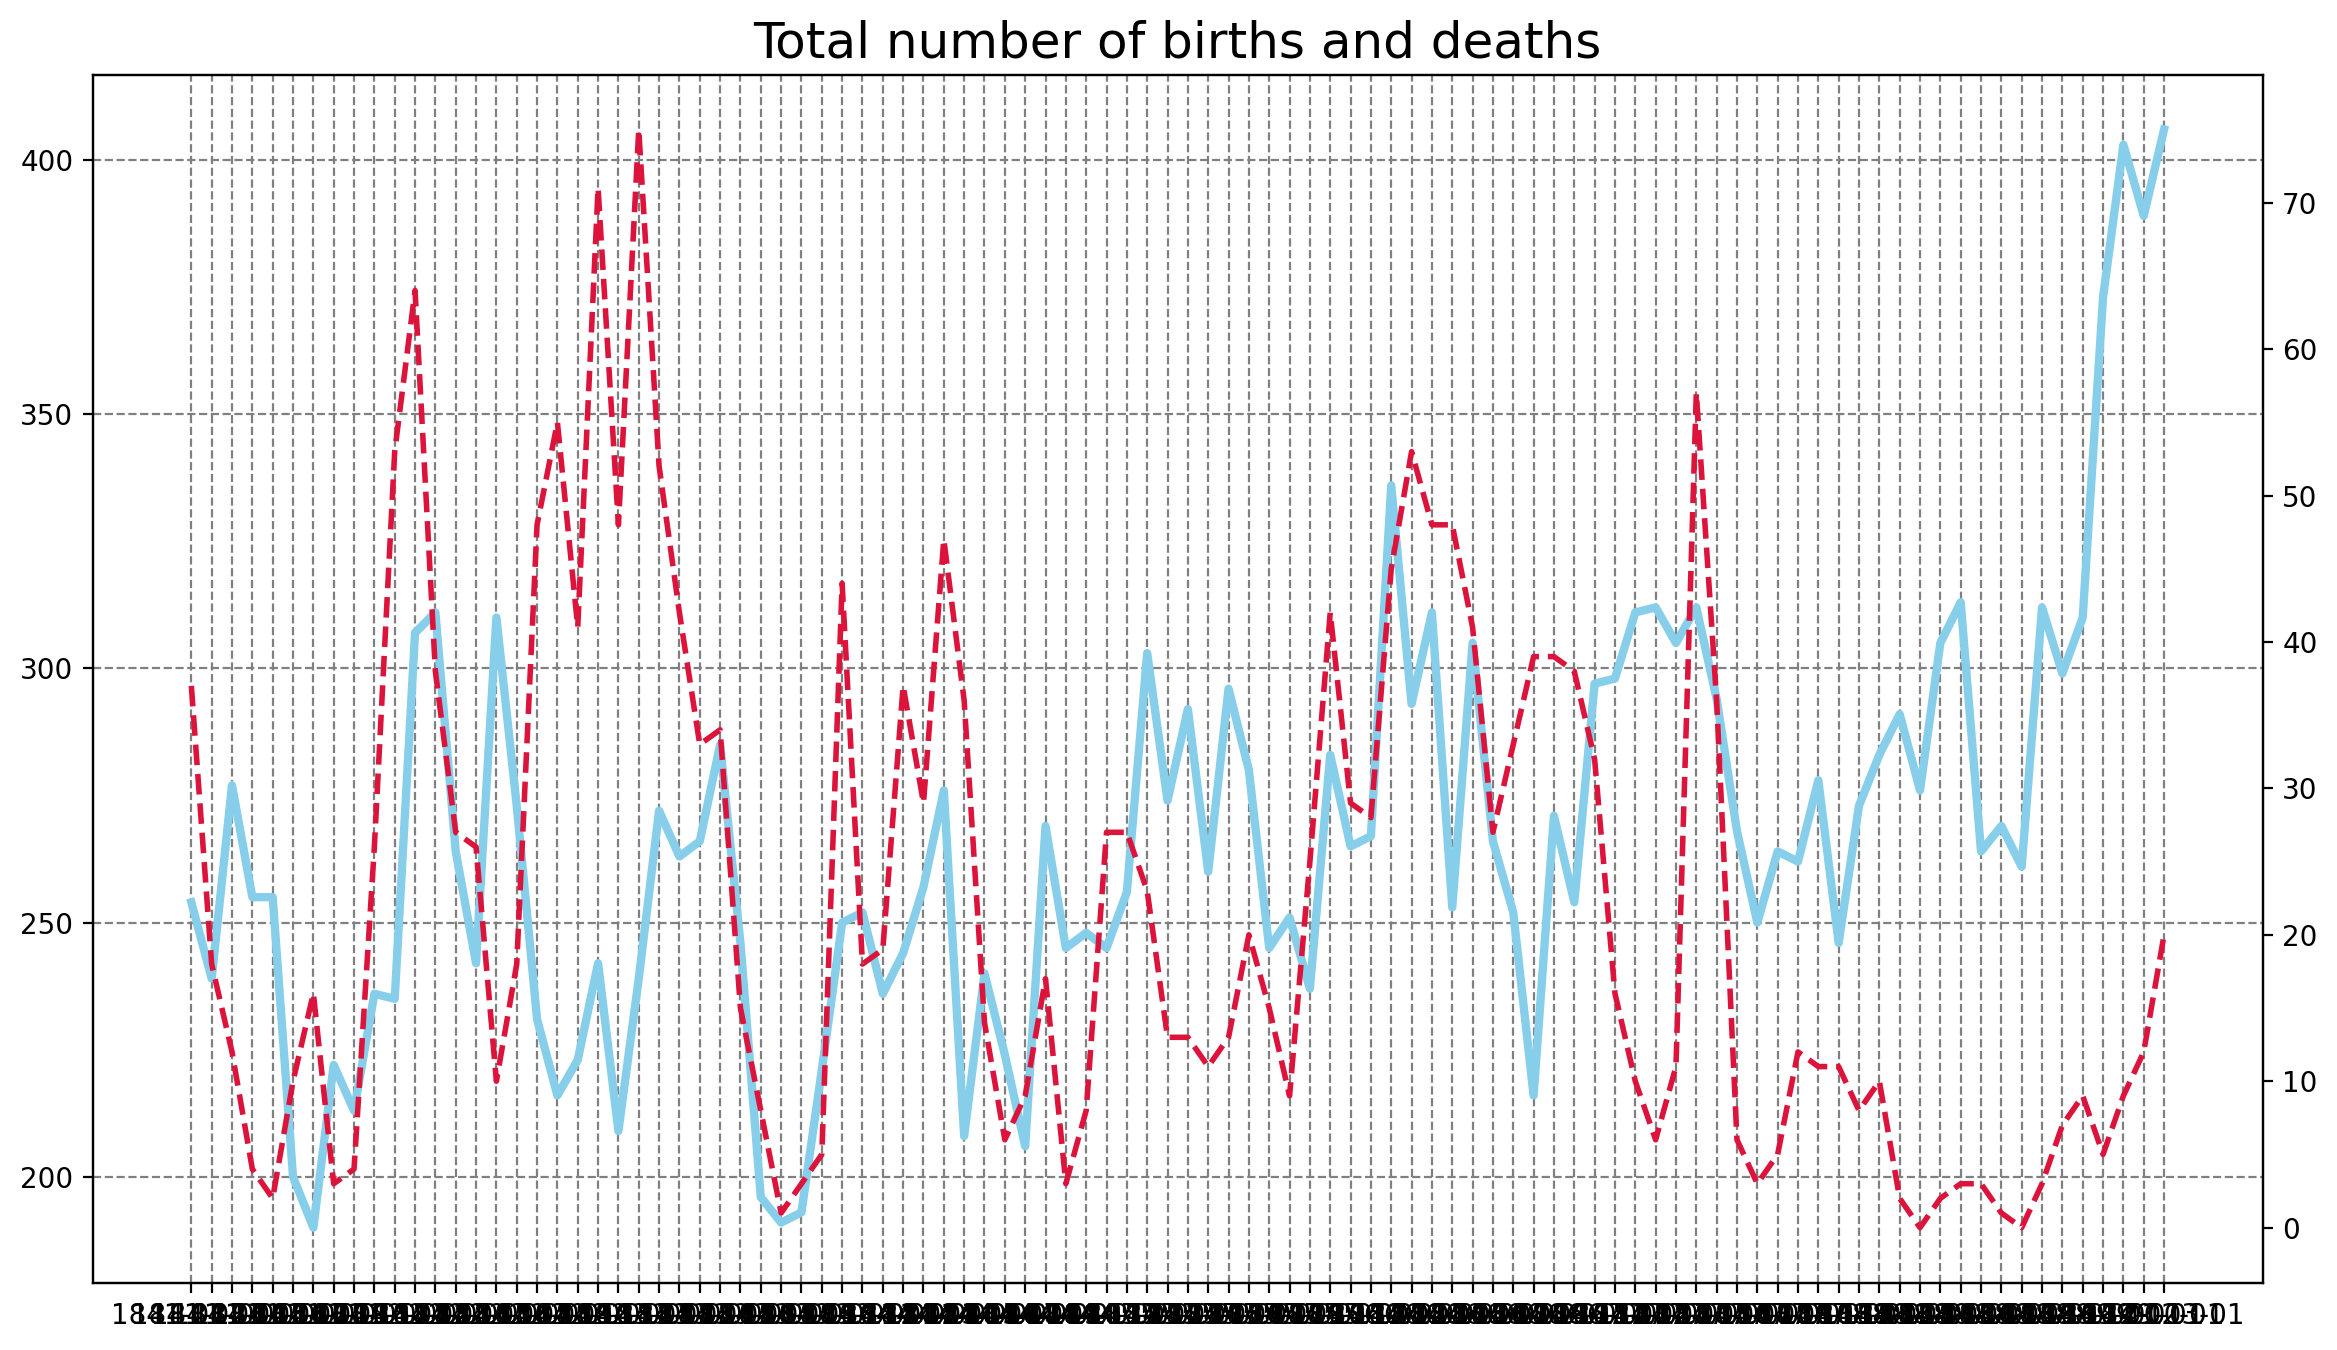

In [ ]:
#Visualise the Total Number of Births 🤱 and Deaths 💀 over Time
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total number of births and deaths', fontsize=18)

ax1=plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

#births
ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3)

#deaths
ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle="--")

plt.show()

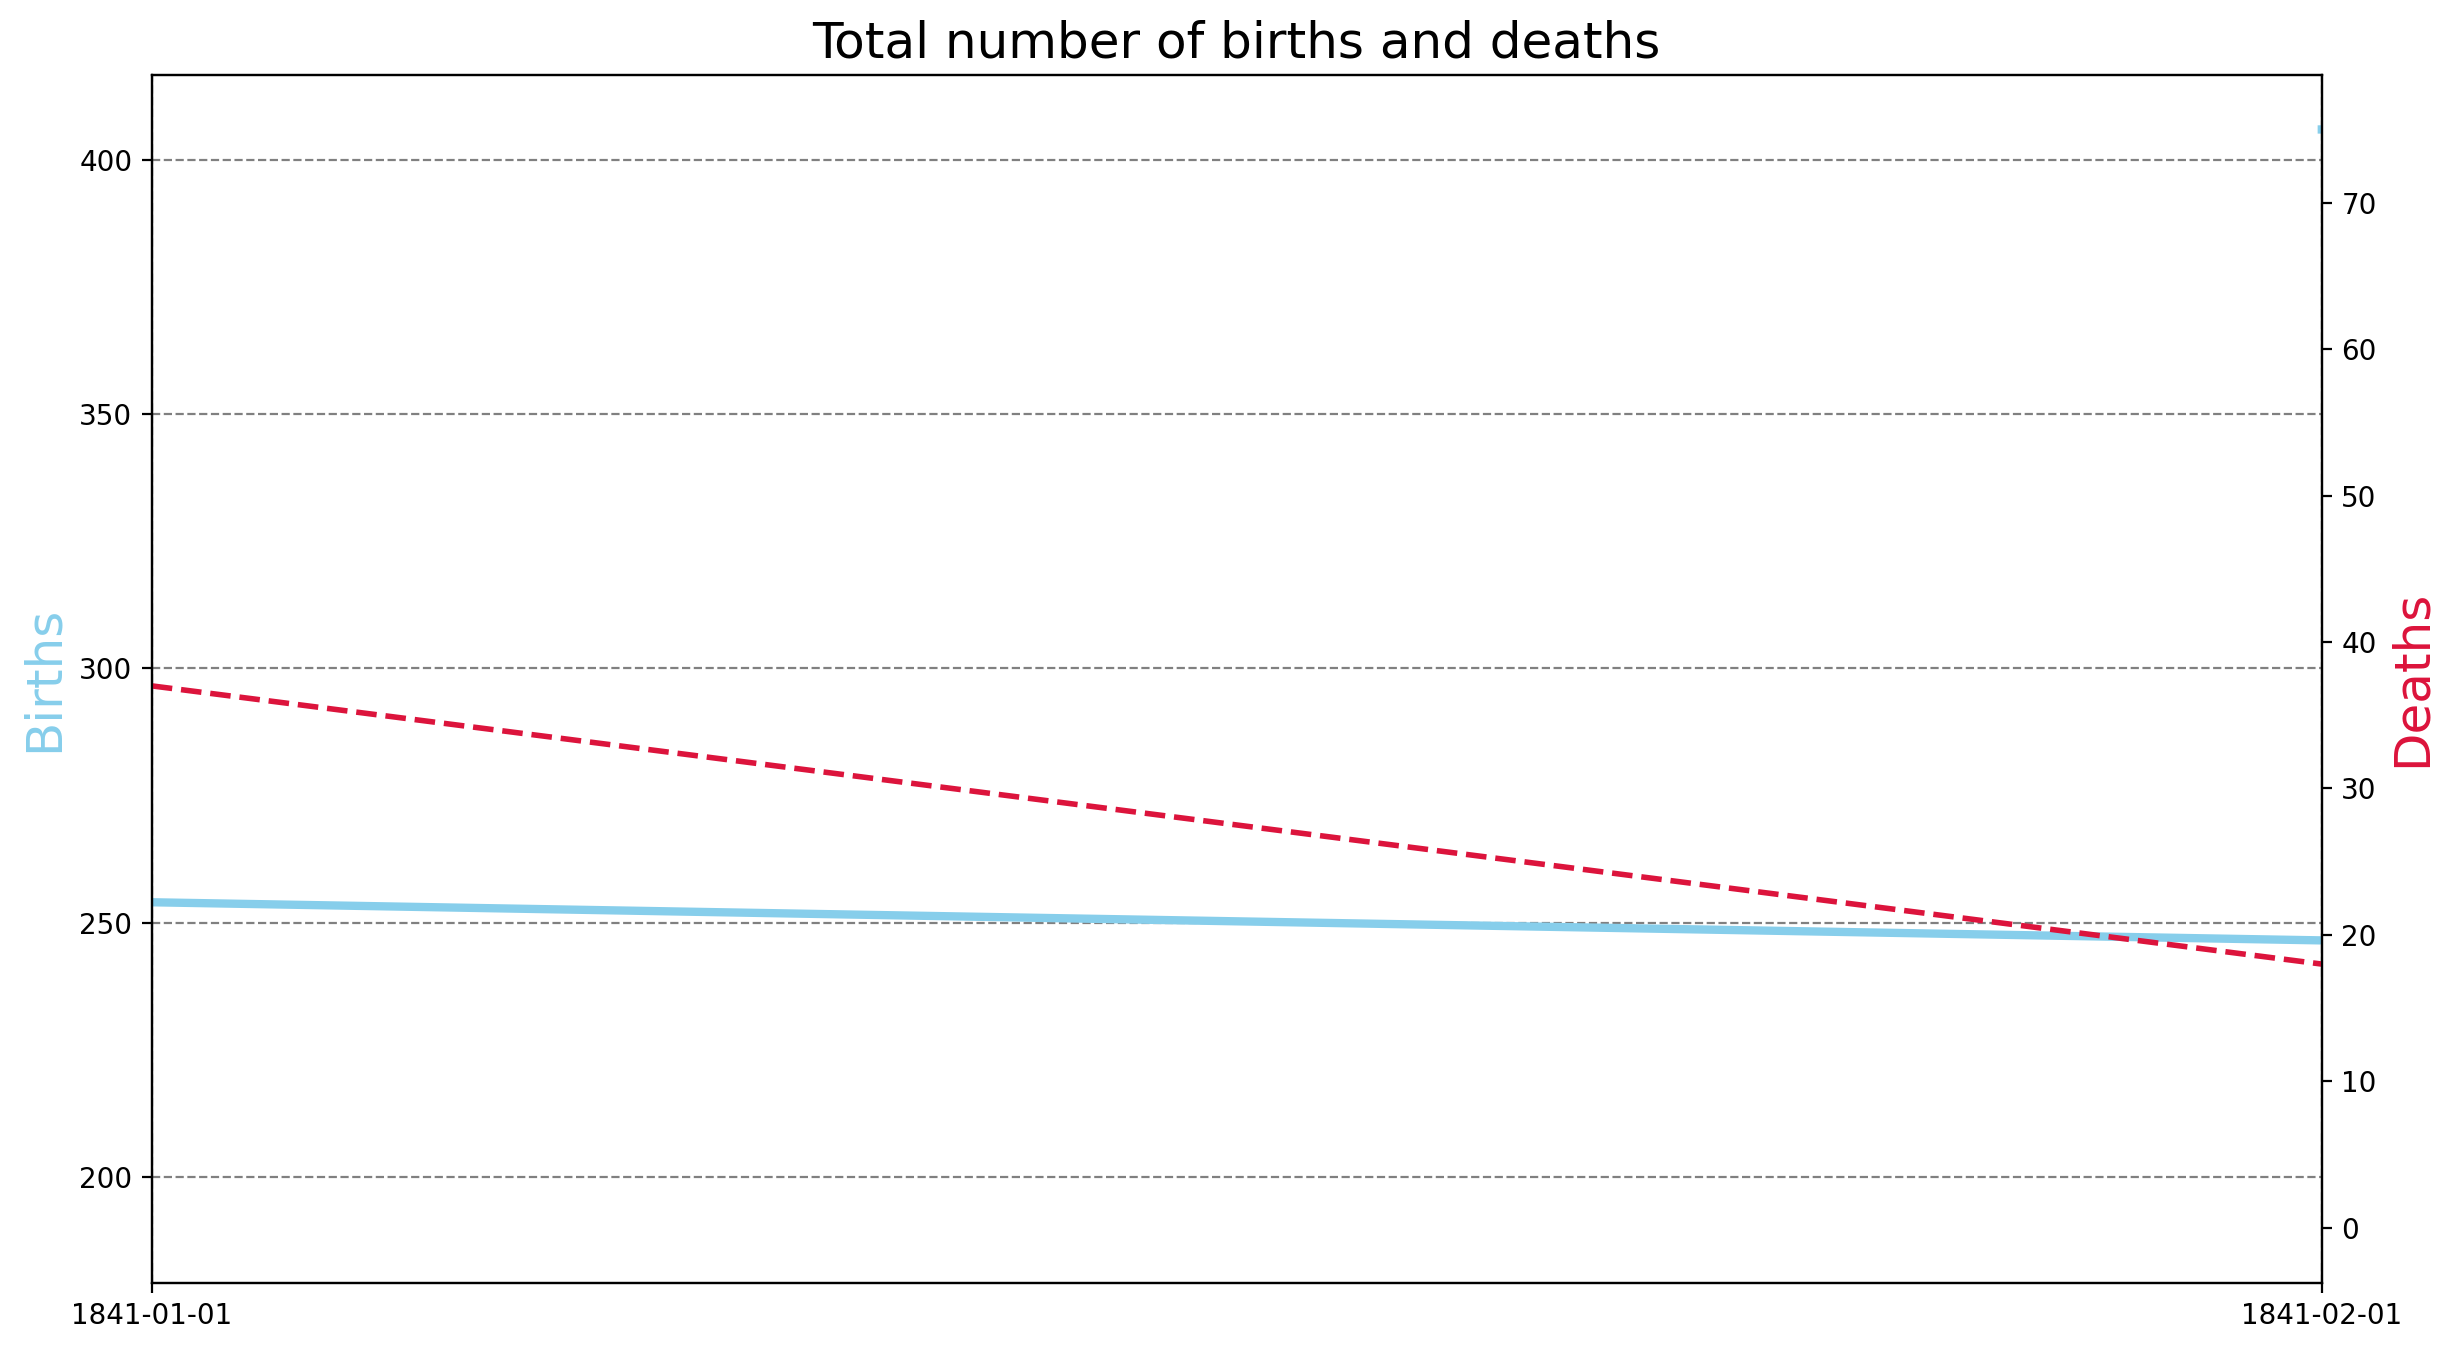

In [ ]:
#To get the tickmarks showing up on the x-axis, we need to use mdates and Matplotlib's locators.
import matplotlib.dates as mdates
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 

#Visualise the Total Number of Births 🤱 and Deaths 💀 over Time
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total number of births and deaths', fontsize=18)

ax1=plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births',color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths',color='crimson', fontsize=18)

# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

#births
ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3)

#deaths
ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle="--")

plt.show()

In [ ]:
#Which clinic is bigger or more busy judging by the number of births?
#Has the hospital had more patients over time?
#What was the highest number of deaths recorded in clinic 1 and clinic 2?
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title = 'total yearly births by clinic')
line.show()

In [ ]:
#Total yearly deaths (by clinic)
line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title ='Total yearly deaths by clinic')
line.show()

In [ ]:
#Calculate the Proportion of Deaths at Each Clinic
#Adding a new column called percentage deaths
df_yearly['pct_deaths'] = df_yearly.deaths/df_yearly.births

In [ ]:
#Calculating the average death rate in clinic 1
clinic_1 = df_yearly[df_yearly.clinic =='clinic 1']
avg_c1 = clinic_1.deaths.sum()/clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%')

Average death rate in clinic 1 is 9.92%


In [ ]:
#Calculating the average death rate in clinic 2
clinic_2 = df_yearly[df_yearly.clinic =='clinic 2']
avg_c2 = clinic_2.deaths.sum()/clinic_2.births.sum()*100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%')

Average death rate in clinic 2 is 3.88%


In [ ]:
#Analyzing in a chart
line = px.line(df_yearly,
               x='year',
               y='pct_deaths',
               color='clinic',
               title ='Proportion of yearly deaths by clinic')
line.show()

In [ ]:
#There is a higher proportion of deaths in clinic 1 compared to clinic 2

In [ ]:
#New column called percentage deaths for monthly
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

In [ ]:
#Create 2 subsets before and after handwashing
handwashing_start = '1846-06-01'
before_washing = df_monthly[df_monthly.date<handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [ ]:
#Calculating the avg death rate before and after washing hands
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.6%
Average death rate AFTER 1847 was 4.87%


In [ ]:
#To work out the moving 6-month average we first set the date column as the index.
#Then we can use the same Pandas functions as in the Google Trends notebook.
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

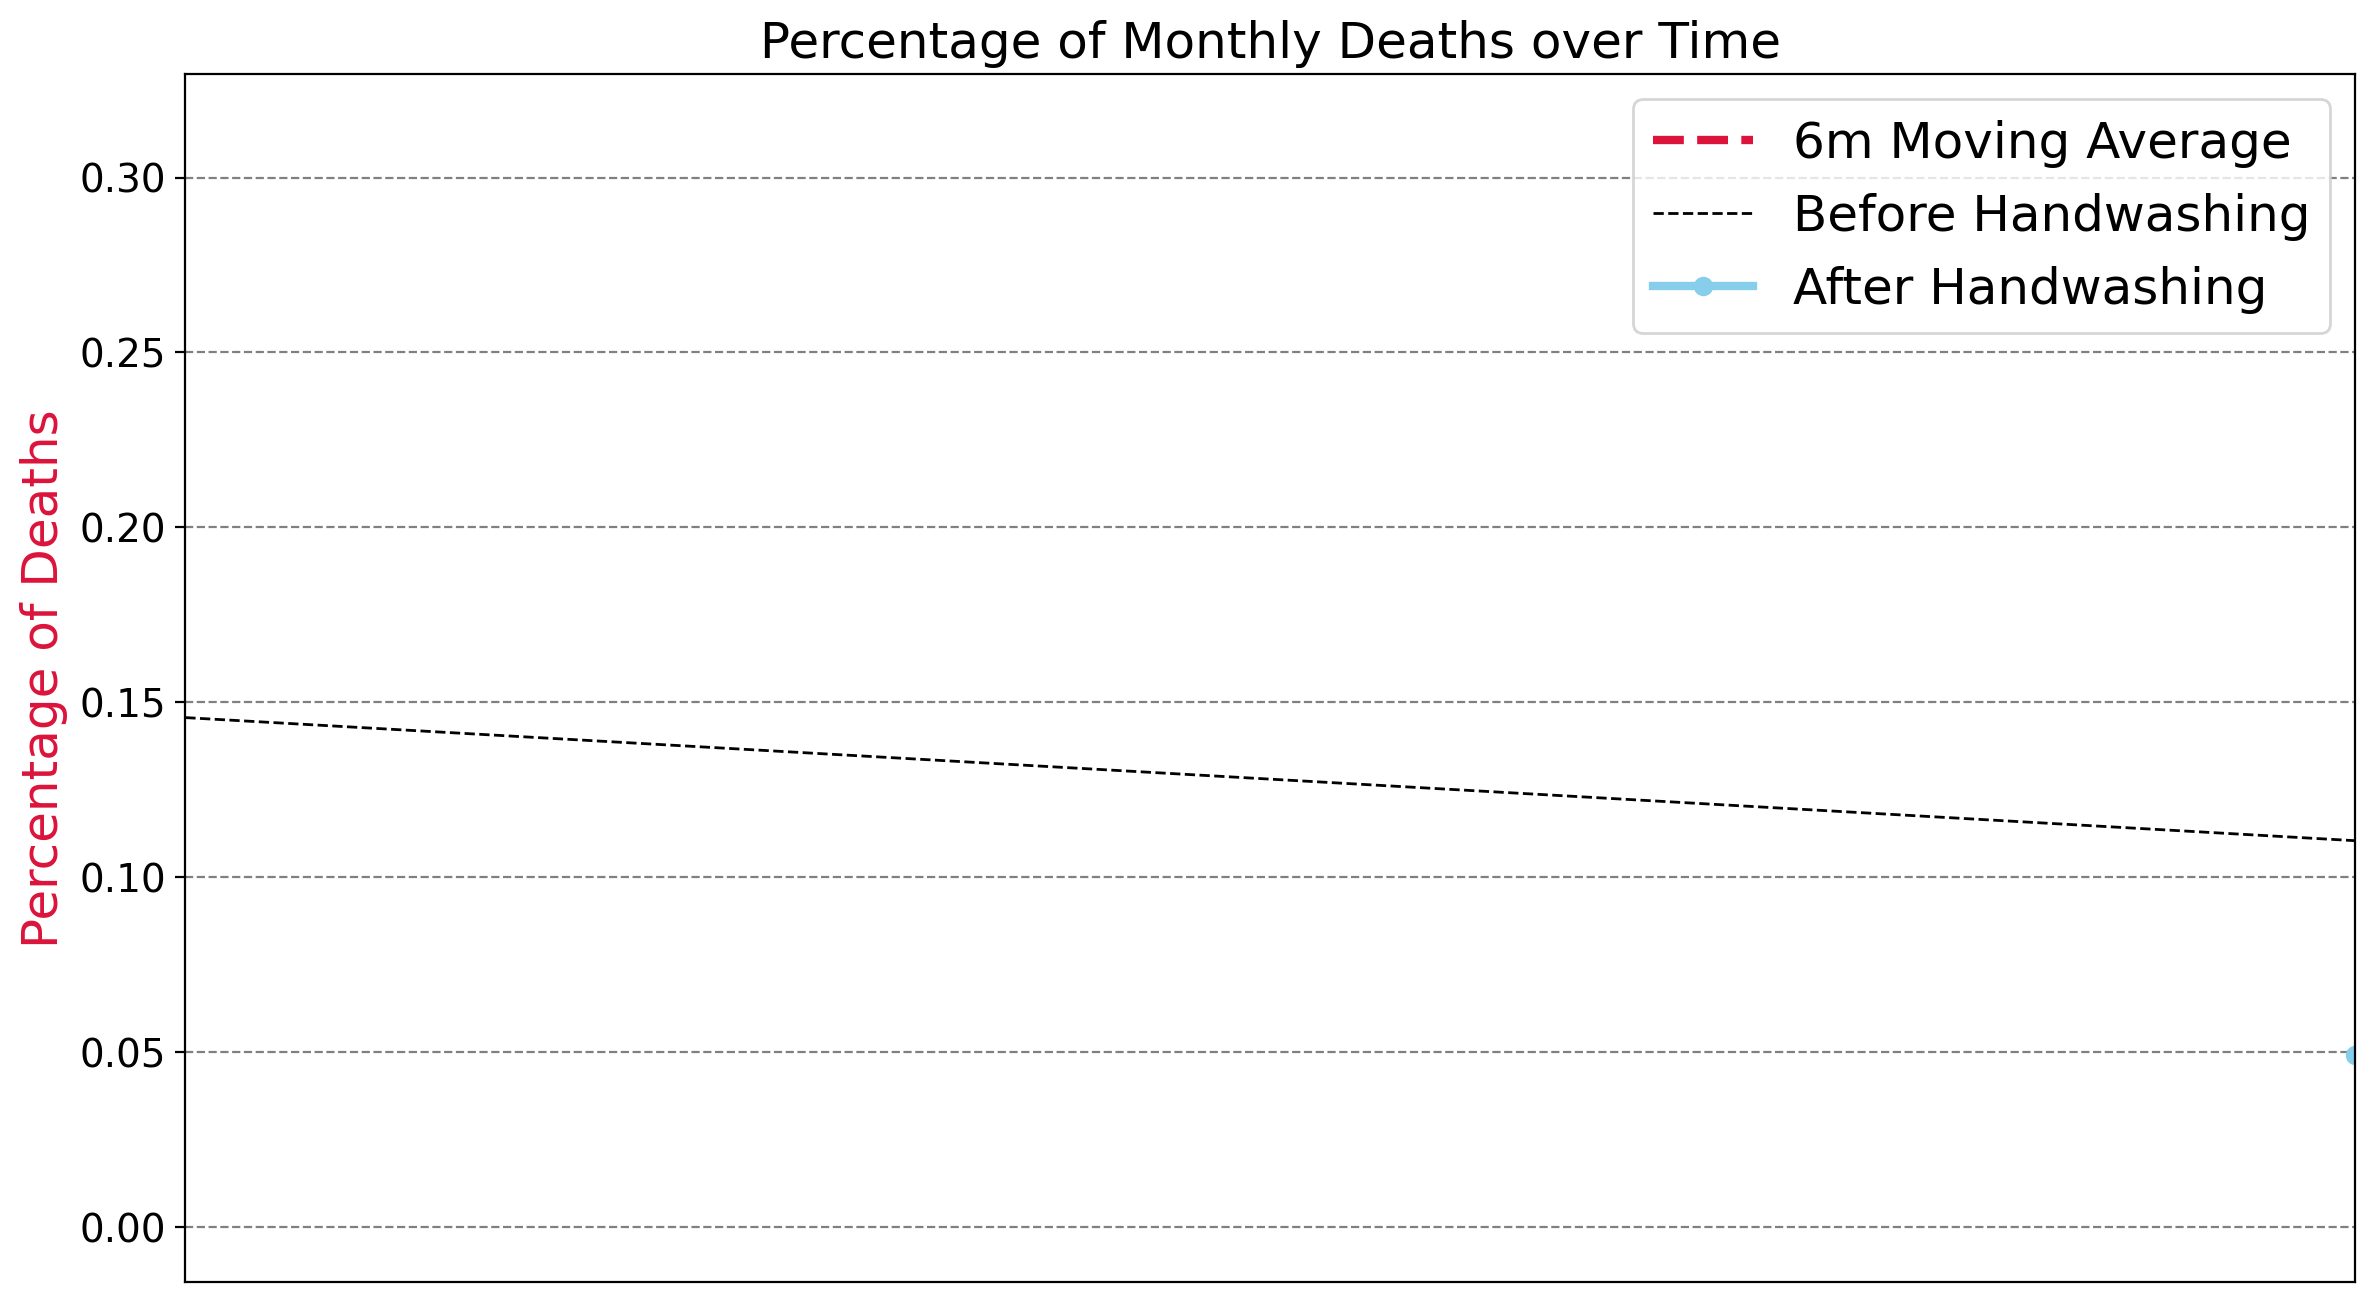

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

In [ ]:
#Calculate the Difference in the Average Monthly Death Rate
avg_prob_before = before_washing.pct_deaths.mean()*100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')

avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')

mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')

times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 5.07%.
Handwashing reduced the monthly proportion of deaths by 5.43%!
This is a 2.1x improvement!


In [ ]:
#Using Box Plots to Show How the Death Rate Changed Before and After Handwashing
#Use NumPy's .where() function to add a column to df_monthly that shows if 
#a particular date was before or after the start of handwashing.
df_monthly['washing_hands'] = np.where(df_monthly.date<handwashing_start,'No','Yes')

In [ ]:
#Now use plotly
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

In [ ]:
#Use Histograms to Visualise the Monthly Distribution of Outcomes
hist = px.histogram(df_monthly,
                    x='pct_deaths',
                    color='washing_hands',
                    nbins=30,
                    opacity=0.6,
                    barmode='overlay',
                    histnorm='percent',
                    marginal='box')

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist.show()

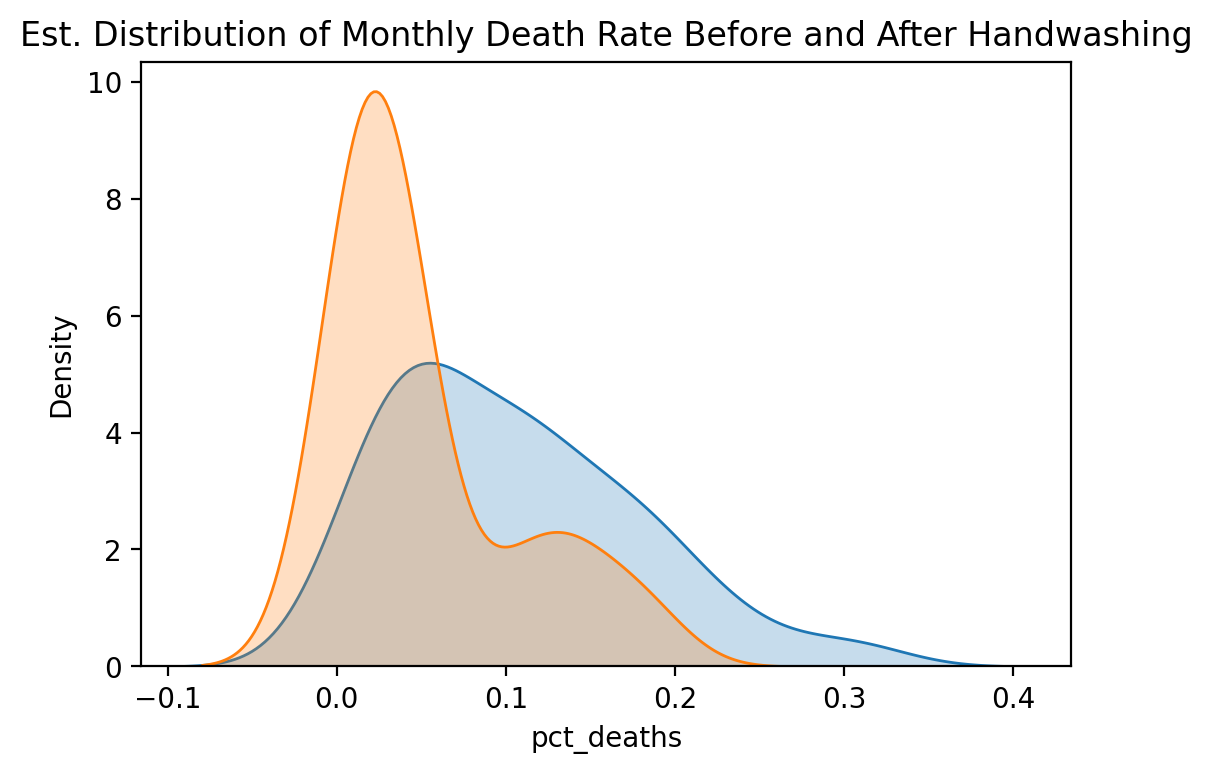

In [ ]:
#Use a Kernel Density Estimate (KDE) to visualise a smooth distribution
#To create two bell-shaped curves of the estimated distributions of the death rates we just call .kdeplot() twice.
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

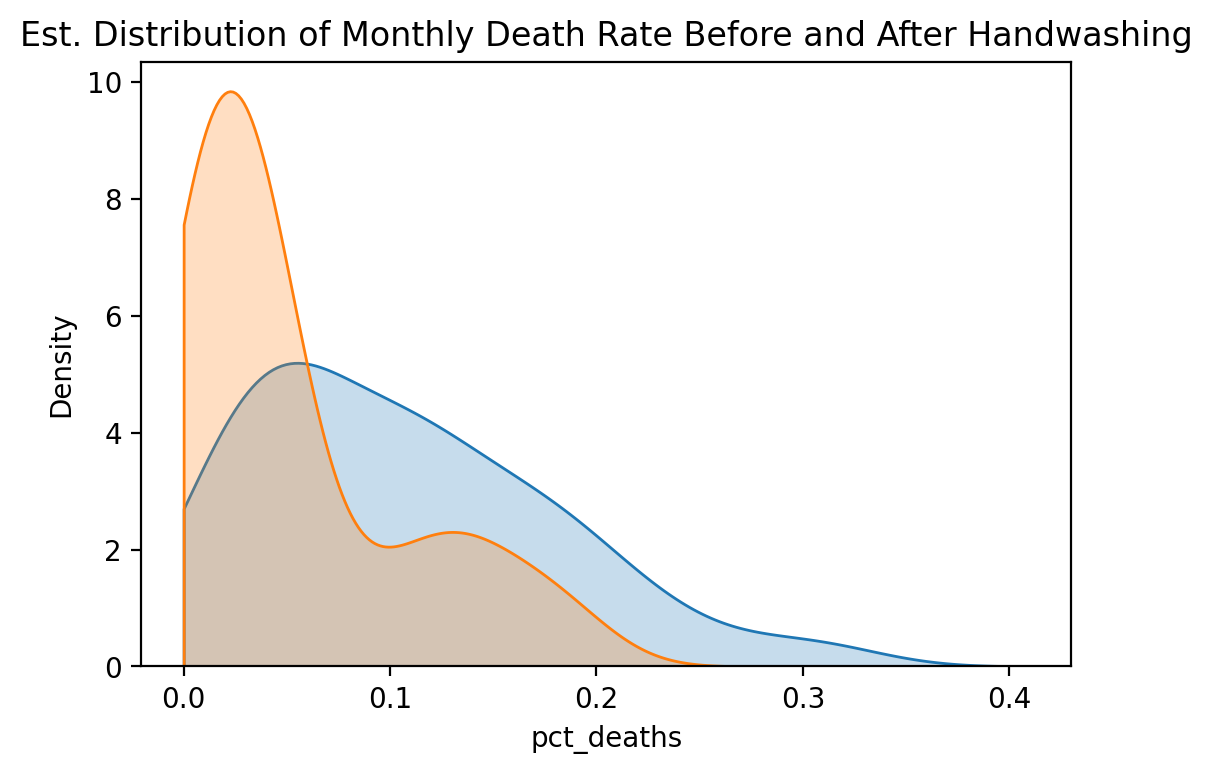

In [ ]:
#Getting rid of the minus percentage
plt.figure(dpi=200)

sns.kdeplot(before_washing.pct_deaths, shade=True, clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, shade=True, clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
#Can insert a xlim
plt.xlim = 0,0.4

plt.show()

In [ ]:
#Use a T-Test to Show Statistical Significance
import scipy.stats as stats
t_stat,p_value = stats.ttest_ind(a=before_washing.pct_deaths,
                                 b=after_washing.pct_deaths)
print(f'p-value is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-value is 0.0002504345
t-statstic is 3.804


In [ ]:
#If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.
#Since its less than 1%, we can be certain that handwashing has made a difference to the monthly
#death rates